Get Microcap Stock Data From Yahoo Finance

In [1]:
import yfinance as yf
import pandas as pd

# Replace these with the desired microcap stock symbols
microcap_symbols = ['SAVE','CLNE','LAZR','AMWL','GEO']

# Set the start and end dates for historical data
start_date = '2020-01-01'
end_date = '2024-01-01'

# Create an empty list to store stock dataframes
all_stock_dataframes = []

# Loop through each microcap stock symbol
for symbol in microcap_symbols:
    # Fetch historical data for the current stock symbol
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    
    # Add stock data to the list
    stock_data['level_0'] = symbol  # Add Ticker column
    all_stock_dataframes.append(stock_data)

# Combine all dataframes into one
combined_data = pd.concat(all_stock_dataframes)

# Reset the index to make the 'Date' column a regular column
combined_data.reset_index(inplace=True)

# Save the combined data to a single CSV file
csv_filename = 'historical_data.csv'
combined_data.to_csv(csv_filename, index=False)
print(f'Combined data saved to {csv_filename}')

# Display the combined data
print(combined_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Combined data saved to historical_data.csv
        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2020-01-02  40.700001  40.930000  40.099998  40.650002  36.785271  1027400   
1 2020-01-03  39.660000  39.930000  38.330002  39.820000  36.034187  1327700   
2 2020-01-06  39.299999  40.540001  39.049999  40.389999  36.549992  1003500   
3 2020-01-07  40.220001  40.380001  39.220001  39.500000  35.744614   866700   
4 2020-01-08  39.119999  40.540001  39.009998  39.939999  36.142769  1193700   

  level_0  
0    SAVE  
1    SAVE  
2    SAVE  
3    SAVE  
4    SAVE  


In [2]:
print(combined_data.tail())

           Date   Open   High    Low  Close  Adj Close   Volume level_0
4846 2023-12-22  11.10  11.35  11.00  11.23      11.23  2499200     GEO
4847 2023-12-26  11.24  11.35  11.10  11.15      11.15  1537600     GEO
4848 2023-12-27  11.24  11.31  11.06  11.15      11.15  1339300     GEO
4849 2023-12-28  11.22  11.33  11.16  11.25      11.25  1491500     GEO
4850 2023-12-29  11.13  11.17  10.56  10.83      10.83  6001000     GEO


In [3]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

Feature Engineering

In [4]:
combined_data['Daily Returns'] = combined_data.groupby('level_0')['Adj Close'].pct_change()
combined_data['Daily Returns'].fillna(0, inplace=True)

In [5]:
#Calculate Daily Volatility
rolling_window = 50  # Default rolling window size
initial_window = 10  # Shorter rolling window size for initial periods

# Calculate Volatility with different rolling window for initial periods
combined_data['Volatility'] = combined_data.groupby('level_0')['Daily Returns'].apply(
    lambda x: x.rolling(window=initial_window, min_periods=1).std() if x.first_valid_index() < rolling_window else x.rolling(window=rolling_window).std()
).reset_index(0, drop=True)

# Fill remaining NaN values with 0 or another appropriate value
combined_data['Volatility'].fillna(0, inplace=True)

# Display the combined data with added features
print(combined_data.head())


        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2020-01-02  40.700001  40.930000  40.099998  40.650002  36.785271  1027400   
1 2020-01-03  39.660000  39.930000  38.330002  39.820000  36.034187  1327700   
2 2020-01-06  39.299999  40.540001  39.049999  40.389999  36.549992  1003500   
3 2020-01-07  40.220001  40.380001  39.220001  39.500000  35.744614   866700   
4 2020-01-08  39.119999  40.540001  39.009998  39.939999  36.142769  1193700   

  level_0  Daily Returns  Volatility  
0    SAVE       0.000000    0.000000  
1    SAVE      -0.020418    0.014438  
2    SAVE       0.014314    0.017455  
3    SAVE      -0.022035    0.017411  
4    SAVE       0.011139    0.017129  


In [6]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

combined_data['RSI'] = combined_data.groupby('level_0').apply(calculate_rsi).reset_index(0, drop=True)
combined_data['RSI'].fillna(0, inplace=True)
print(combined_data.head())

        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2020-01-02  40.700001  40.930000  40.099998  40.650002  36.785271  1027400   
1 2020-01-03  39.660000  39.930000  38.330002  39.820000  36.034187  1327700   
2 2020-01-06  39.299999  40.540001  39.049999  40.389999  36.549992  1003500   
3 2020-01-07  40.220001  40.380001  39.220001  39.500000  35.744614   866700   
4 2020-01-08  39.119999  40.540001  39.009998  39.939999  36.142769  1193700   

  level_0  Daily Returns  Volatility        RSI  
0    SAVE       0.000000    0.000000   0.000000  
1    SAVE      -0.020418    0.014438   0.000000  
2    SAVE       0.014314    0.017455  40.714288  
3    SAVE      -0.022035    0.017411  24.890839  
4    SAVE       0.011139    0.017129  36.996106  


In [7]:
import pandas as pd

def calculate_stochastic_oscillator(data, k_window=1, d_window=1):
    # Calculate %K for each ticker separately
    data['%K'] = data.groupby('level_0').apply(
        lambda x: ((x['Close'] - x['Low'].rolling(window=k_window).min()) / (x['High'].rolling(window=k_window).max() - x['Low'].rolling(window=k_window).min())) * 100
    ).reset_index(level=0, drop=True)

    # Calculate %D (simple moving average of %K) for each ticker separately
    data['%D'] = data.groupby('level_0')['%K'].transform(lambda x: x.rolling(window=d_window).mean())

    return data

# Assuming 'combined_data' is your DataFrame with 'Date', 'High', 'Low', 'Close', 'level_0' columns
# If not, replace 'combined_data' with the actual DataFrame variable
combined_data = calculate_stochastic_oscillator(combined_data)

# Display the DataFrame with Stochastic Oscillator values
print(combined_data.head())
print(combined_data.tail())


        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2020-01-02  40.700001  40.930000  40.099998  40.650002  36.785271  1027400   
1 2020-01-03  39.660000  39.930000  38.330002  39.820000  36.034187  1327700   
2 2020-01-06  39.299999  40.540001  39.049999  40.389999  36.549992  1003500   
3 2020-01-07  40.220001  40.380001  39.220001  39.500000  35.744614   866700   
4 2020-01-08  39.119999  40.540001  39.009998  39.939999  36.142769  1193700   

  level_0  Daily Returns  Volatility        RSI         %K         %D  
0    SAVE       0.000000    0.000000   0.000000  66.265282  66.265282  
1    SAVE      -0.020418    0.014438   0.000000  93.124955  93.124955  
2    SAVE       0.014314    0.017455  40.714288  89.932795  89.932795  
3    SAVE      -0.022035    0.017411  24.890839  24.137829  24.137829  
4    SAVE       0.011139    0.017129  36.996106  60.784231  60.784231  
           Date   Open   High    Low  Close  Adj Close   Volume level_0  \
4846 2023-12

In [8]:
import pandas as pd

def calculate_ema(data, span=12):
    return data.groupby('level_0')['Close'].transform(lambda x: x.ewm(span=span, adjust=False).mean())

def calculate_sma(data, window=1):
    return data.groupby('level_0')['Close'].transform(lambda x: x.rolling(window=window).mean())

combined_data['SMA'] = calculate_sma(combined_data)
combined_data['EMA'] = calculate_ema(combined_data)

print(combined_data.head())
print(combined_data.tail())


        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2020-01-02  40.700001  40.930000  40.099998  40.650002  36.785271  1027400   
1 2020-01-03  39.660000  39.930000  38.330002  39.820000  36.034187  1327700   
2 2020-01-06  39.299999  40.540001  39.049999  40.389999  36.549992  1003500   
3 2020-01-07  40.220001  40.380001  39.220001  39.500000  35.744614   866700   
4 2020-01-08  39.119999  40.540001  39.009998  39.939999  36.142769  1193700   

  level_0  Daily Returns  Volatility        RSI         %K         %D  \
0    SAVE       0.000000    0.000000   0.000000  66.265282  66.265282   
1    SAVE      -0.020418    0.014438   0.000000  93.124955  93.124955   
2    SAVE       0.014314    0.017455  40.714288  89.932795  89.932795   
3    SAVE      -0.022035    0.017411  24.890839  24.137829  24.137829   
4    SAVE       0.011139    0.017129  36.996106  60.784231  60.784231   

         SMA        EMA  
0  40.650002  40.650002  
1  39.820000  40.522309  
2 

In [9]:
combined_data['NextDayClose'] = combined_data.groupby('level_0')['Close'].shift(-1)

# Calculate stock price movements
# Create a new column 'Movement' based on the difference between 'NextDayClose' and 'Close'
combined_data['Movement'] = combined_data.groupby('level_0')['NextDayClose'].diff()

# Map positive movements to +1, negative movements to -1, and neutral movements to 0
combined_data['Movement'] = combined_data['Movement'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Now the 'Movement' column contains +1 for positive movement, -1 for negative movement, and 0 for neutral movement
print(combined_data[['Date', 'Close','NextDayClose', 'Movement']])


           Date      Close  NextDayClose  Movement
0    2020-01-02  40.650002     39.820000         0
1    2020-01-03  39.820000     40.389999         1
2    2020-01-06  40.389999     39.500000        -1
3    2020-01-07  39.500000     39.939999         1
4    2020-01-08  39.939999     40.000000         1
...         ...        ...           ...       ...
4846 2023-12-22  11.230000     11.150000        -1
4847 2023-12-26  11.150000     11.150000         0
4848 2023-12-27  11.150000     11.250000         1
4849 2023-12-28  11.250000     10.830000        -1
4850 2023-12-29  10.830000           NaN         0

[4851 rows x 4 columns]


In [10]:
# Calculate previous day's close price
combined_data['PreviousDayClose'] = combined_data.groupby('level_0')['Close'].shift(1)

# Fill NaN values in 'PreviousDayClose' column with the first close price for each stock
combined_data['PreviousDayClose'] = combined_data.groupby('level_0')['PreviousDayClose'].fillna(method='bfill')

# Print the DataFrame including the previous day's close price
print(combined_data[['Date', 'Close', 'PreviousDayClose']])


           Date      Close  PreviousDayClose
0    2020-01-02  40.650002         40.650002
1    2020-01-03  39.820000         40.650002
2    2020-01-06  40.389999         39.820000
3    2020-01-07  39.500000         40.389999
4    2020-01-08  39.939999         39.500000
...         ...        ...               ...
4846 2023-12-22  11.230000         11.100000
4847 2023-12-26  11.150000         11.230000
4848 2023-12-27  11.150000         11.150000
4849 2023-12-28  11.250000         11.150000
4850 2023-12-29  10.830000         11.250000

[4851 rows x 3 columns]


In [11]:
# Save the DataFrame to a CSV file
csv_filename = 'dataset.csv'
combined_data.to_csv(csv_filename, index=False)

# Display the DataFrame with the new 'Daily Returns' column
print("DataFrame with Daily Returns:")
print(combined_data.head())

# Optionally, you can print a message indicating the file has been saved
print(f'DataFrame saved to {csv_filename}')

DataFrame with Daily Returns:
        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2020-01-02  40.700001  40.930000  40.099998  40.650002  36.785271  1027400   
1 2020-01-03  39.660000  39.930000  38.330002  39.820000  36.034187  1327700   
2 2020-01-06  39.299999  40.540001  39.049999  40.389999  36.549992  1003500   
3 2020-01-07  40.220001  40.380001  39.220001  39.500000  35.744614   866700   
4 2020-01-08  39.119999  40.540001  39.009998  39.939999  36.142769  1193700   

  level_0  Daily Returns  Volatility        RSI         %K         %D  \
0    SAVE       0.000000    0.000000   0.000000  66.265282  66.265282   
1    SAVE      -0.020418    0.014438   0.000000  93.124955  93.124955   
2    SAVE       0.014314    0.017455  40.714288  89.932795  89.932795   
3    SAVE      -0.022035    0.017411  24.890839  24.137829  24.137829   
4    SAVE       0.011139    0.017129  36.996106  60.784231  60.784231   

         SMA        EMA  NextDayClose  Movement  P

In [12]:
print("DataFrame with Daily Returns:")
print(combined_data.head())
print(combined_data.tail())


DataFrame with Daily Returns:
        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2020-01-02  40.700001  40.930000  40.099998  40.650002  36.785271  1027400   
1 2020-01-03  39.660000  39.930000  38.330002  39.820000  36.034187  1327700   
2 2020-01-06  39.299999  40.540001  39.049999  40.389999  36.549992  1003500   
3 2020-01-07  40.220001  40.380001  39.220001  39.500000  35.744614   866700   
4 2020-01-08  39.119999  40.540001  39.009998  39.939999  36.142769  1193700   

  level_0  Daily Returns  Volatility        RSI         %K         %D  \
0    SAVE       0.000000    0.000000   0.000000  66.265282  66.265282   
1    SAVE      -0.020418    0.014438   0.000000  93.124955  93.124955   
2    SAVE       0.014314    0.017455  40.714288  89.932795  89.932795   
3    SAVE      -0.022035    0.017411  24.890839  24.137829  24.137829   
4    SAVE       0.011139    0.017129  36.996106  60.784231  60.784231   

         SMA        EMA  NextDayClose  Movement  P

Get News Data from Yahoo finance using RSS feed URL

In [13]:
import csv
import feedparser
from datetime import datetime, timedelta

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36 Brave/91.0.4472.124'
}

# List of microcap stock tickers
microcap_tickers = ['SAVE','CLNE','LAZR','AMWL','GEO']

start_date = datetime.strptime('2020-01-01', '%Y-%m-%d')  # Replace with your desired start date
end_date = datetime.strptime('2024-01-01', '%Y-%m-%d')    # Replace with your desired end date

# Initialize an empty set to store unique news headlines
all_headlines_set = set()

# Fetch news for each month within the date range for each stock
for ticker in microcap_tickers:
    current_month = start_date
    while current_month <= end_date:
        # Create the RSS feed URL for the current month and stock
        rssfeedurl = f'https://feeds.finance.yahoo.com/rss/2.0/headline?s={ticker}&startdate={current_month.strftime("%Y-%m-%d")}&enddate={(current_month + timedelta(days=30)).strftime("%Y-%m-%d")}&region=US&lang=en-US'
        
        # Parse the RSS feed
        Newsfeed = feedparser.parse(rssfeedurl)

        # Extract unique headlines and add to the set
        unique_headlines = set(entry.title for entry in Newsfeed.entries)
        all_headlines_set.update((ticker, headline, current_month) for headline in unique_headlines)

        # Move to the next month
        current_month += timedelta(days=31)  # Add a day buffer for safety

# Save unique headlines to a combined CSV file
csv_filename = 'microcap_news_headlines.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Ticker', 'Headline', 'Published'])  # Write header row

    # Write rows with unique ticker, headline, and publication date
    for headline_data in all_headlines_set:
        writer.writerow([headline_data[0], headline_data[1], headline_data[2]])

print(f'Combined microcap headlines saved to {csv_filename}')


Combined microcap headlines saved to microcap_news_headlines.csv


In [14]:
import pandas as pd
combined_headlines_df = pd.read_csv('microcap_news_headlines.csv')
print(combined_headlines_df.head())
print(combined_headlines_df.tail())
combined_headlines_df .info()

  Ticker                                           Headline  \
0   CLNE    The Top 7 Under-$10 Stocks to Buy in March 2024   
1   LAZR  Luminar Technologies, Inc. (LAZR) May Find a B...   
2   CLNE  Could This Beaten-Down Energy Stock Be an Acqu...   
3   AMWL  Axogen, Inc. Appoints Kathy Weiler to its Boar...   
4   SAVE  The Score: Spirit Airlines, Target, Broadcom a...   

             Published  
0  2020-01-01 00:00:00  
1  2020-11-06 00:00:00  
2  2020-10-06 00:00:00  
3  2020-05-04 00:00:00  
4  2020-12-07 00:00:00  
     Ticker                                           Headline  \
4795   CLNE  Owning 50% shares,institutional owners seem in...   
4796   SAVE    11 Highest-Paying Airlines for Pilots in the US   
4797   AMWL  Amwell Names Cynthia Horner, M.D., Chief Medic...   
4798   SAVE   JetBlue and Spirit Airlines Call Off Merger Deal   
4799   LAZR  Luminar Technologies, Inc. (NASDAQ:LAZR) Q4 20...   

                Published  
4795  2023-11-27 00:00:00  
4796  2020-06-04 0

In [15]:
import pandas as pd

# Load the combined news data with features
news_data = pd.read_csv('microcap_news_headlines.csv')

# Drop duplicate entries based on 'Ticker' and 'Headline' columns
news_data.drop_duplicates(subset=['Ticker', 'Headline'], inplace=True)

# Save the updated news data to a new CSV file
updated_news_filename = 'updated_news_data.csv'
news_data.to_csv(updated_news_filename, index=False)

print(f'Updated news data saved to {updated_news_filename}')
news_data.info()

Updated news data saved to updated_news_data.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 408
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ticker     100 non-null    object
 1   Headline   100 non-null    object
 2   Published  100 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


Feature Engineering

In [16]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
import nltk
nltk.download('vader_lexicon')

# Load the headlines DataFrame
combined_headlines_df = pd.read_csv('updated_news_data.csv')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each headline
combined_headlines_df['Sentiment Score'] = combined_headlines_df['Headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
combined_headlines_df.to_csv('news_data_features.csv')

# Print the DataFrame with sentiment scores
print("Combined Headlines with Sentiment Scores:")
print(combined_headlines_df)

Combined Headlines with Sentiment Scores:
   Ticker                                           Headline  \
0    CLNE    The Top 7 Under-$10 Stocks to Buy in March 2024   
1    LAZR  Luminar Technologies, Inc. (LAZR) May Find a B...   
2    CLNE  Could This Beaten-Down Energy Stock Be an Acqu...   
3    AMWL  Axogen, Inc. Appoints Kathy Weiler to its Boar...   
4    SAVE  The Score: Spirit Airlines, Target, Broadcom a...   
..    ...                                                ...   
95   LAZR  Down -24.11% in 4 Weeks, Here's Why You Should...   
96   AMWL  American Well Corporation (NYSE:AMWL) Q4 2023 ...   
97   AMWL  Amwell Announces Results for Fourth Quarter an...   
98    GEO  Earnings Preview: Geo Group (GEO) Q4 Earnings ...   
99   SAVE   JetBlue and Spirit Airlines Call Off Merger Deal   

              Published  Sentiment Score  
0   2020-01-01 00:00:00           0.2023  
1   2020-11-06 00:00:00           0.0000  
2   2020-10-06 00:00:00           0.2732  
3   2020-05-04 00

[nltk_data] Downloading package vader_lexicon to C:\Users\Shrijeet
[nltk_data]     Desai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('dataset.csv')

# Assuming 'Published' column is in datetime format, if not, you may need to convert it first
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'Published' column to the desired format
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')

# Save the modified dataframe to a new CSV file
df.to_csv('dataset.csv', index=False)

# Display the modified dataframe
print(df.head())


         Date       Open       High        Low      Close  Adj Close   Volume  \
0  02-01-2020  40.700001  40.930000  40.099998  40.650002  36.785271  1027400   
1  03-01-2020  39.660000  39.930000  38.330002  39.820000  36.034187  1327700   
2  06-01-2020  39.299999  40.540001  39.049999  40.389999  36.549992  1003500   
3  07-01-2020  40.220001  40.380001  39.220001  39.500000  35.744614   866700   
4  08-01-2020  39.119999  40.540001  39.009998  39.939999  36.142769  1193700   

  level_0  Daily Returns  Volatility        RSI         %K         %D  \
0    SAVE       0.000000    0.000000   0.000000  66.265282  66.265282   
1    SAVE      -0.020418    0.014438   0.000000  93.124955  93.124955   
2    SAVE       0.014314    0.017455  40.714288  89.932795  89.932795   
3    SAVE      -0.022035    0.017411  24.890839  24.137829  24.137829   
4    SAVE       0.011139    0.017129  36.996106  60.784231  60.784231   

         SMA        EMA  NextDayClose  Movement  PreviousDayClose  
0  40.

In [18]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('news_data_features.csv')

# Assuming 'Published' column is in datetime format, if not, you may need to convert it first
df['Published'] = pd.to_datetime(df['Published'])

# Convert the 'Published' column to the desired format
df['Published'] = df['Published'].dt.strftime('%d-%m-%Y')

# Save the modified dataframe to a new CSV file
df.to_csv('news_cleandata_with_features.csv', index=False)

# Display the modified dataframe
print(df.head())


   Unnamed: 0 Ticker                                           Headline  \
0           0   CLNE    The Top 7 Under-$10 Stocks to Buy in March 2024   
1           1   LAZR  Luminar Technologies, Inc. (LAZR) May Find a B...   
2           2   CLNE  Could This Beaten-Down Energy Stock Be an Acqu...   
3           3   AMWL  Axogen, Inc. Appoints Kathy Weiler to its Boar...   
4           4   SAVE  The Score: Spirit Airlines, Target, Broadcom a...   

    Published  Sentiment Score  
0  01-01-2020           0.2023  
1  06-11-2020           0.0000  
2  06-10-2020           0.2732  
3  04-05-2020           0.0000  
4  07-12-2020           0.1779  


Merge both historical data and news data csv files to create dataset

In [19]:
import pandas as pd

# Read CSV files
historical_data = pd.read_csv('dataset.csv')
news_data = pd.read_csv('news_cleandata_with_features.csv')

# Ensure consistent date formatting (adjust as needed)
historical_data['Date'] = pd.to_datetime(historical_data['Date']).dt.strftime('%d-%m-%Y')
news_data['Published'] = pd.to_datetime(news_data['Published']).dt.strftime('%d-%m-%Y')

# Merge data using pd.merge for efficiency and reliability
merged_data = pd.merge(
    historical_data,
    news_data[['Published', 'Ticker', 'Headline','Sentiment Score']],  # Select only necessary columns from news_data
    how='left',  # Keep all historical data rows
    left_on=['Date', 'level_0'],
    right_on=['Published', 'Ticker']
)

# Fill NaN values in the 'Headline' column with blank space
merged_data['Headline'].fillna('', inplace=True)

# Explicitly preserve original historical values
merged_data[['Open', 'Close', 'Volume']] = merged_data.groupby(['Date', 'level_0'])[['Open', 'Close', 'Volume']].transform('first')

# Handle duplicates if necessary (adjust aggregation as needed)
merged_data.drop_duplicates(subset=['Date', 'level_0'], inplace=True)  # Example: Keep unique news entries

# Drop unnecessary columns from the final result
merged_data.drop(['Published', 'Ticker'], axis=1, inplace=True)

# Save merged data
merged_data.to_csv('dataset.csv', index=False)

# Print sample to verify results
print(merged_data.head())
print(merged_data.tail())


         Date       Open       High        Low      Close  Adj Close   Volume  \
0  01-02-2020  40.700001  40.930000  40.099998  40.650002  36.785271  1027400   
1  01-03-2020  39.660000  39.930000  38.330002  39.820000  36.034187  1327700   
2  01-06-2020  39.299999  40.540001  39.049999  40.389999  36.549992  1003500   
3  01-07-2020  40.220001  40.380001  39.220001  39.500000  35.744614   866700   
4  01-08-2020  39.119999  40.540001  39.009998  39.939999  36.142769  1193700   

  level_0  Daily Returns  Volatility        RSI         %K         %D  \
0    SAVE       0.000000    0.000000   0.000000  66.265282  66.265282   
1    SAVE      -0.020418    0.014438   0.000000  93.124955  93.124955   
2    SAVE       0.014314    0.017455  40.714288  89.932795  89.932795   
3    SAVE      -0.022035    0.017411  24.890839  24.137829  24.137829   
4    SAVE       0.011139    0.017129  36.996106  60.784231  60.784231   

         SMA        EMA  NextDayClose  Movement  PreviousDayClose Headline

In [20]:
import pandas as pd

# Load your dataset
df = pd.read_csv('dataset.csv')

# Loop through each microcap ticker and backfill the missing sentiment values
for ticker in microcap_tickers:
    # Filter the DataFrame to only include rows for the current ticker
    ticker_rows = df['level_0'] == ticker
    
    # Backfill the missing sentiment values within this ticker's data
    df.loc[ticker_rows, 'Sentiment Score'] = df.loc[ticker_rows, 'Sentiment Score'].fillna(0)


# Save the updated DataFrame if necessary
df.to_csv('dataset.csv', index=False)

In [21]:
import pandas as pd

# Assuming 'your_dataset.csv' is your dataset file and 'Date' is the column with the dates
df = pd.read_csv('dataset.csv')

# Parse the dates, infer the date format, and convert to a standard format e.g., YYYY-MM-DD
# If pandas can't infer the format, you might have to specify it using the format parameter
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')

# Save the cleaned dataset back to a csv
df.to_csv('dataset.csv', index=False)
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     2020-02-01  40.700001  40.930000  40.099998  40.650002  36.785271   
1     2020-03-01  39.660000  39.930000  38.330002  39.820000  36.034187   
2     2020-06-01  39.299999  40.540001  39.049999  40.389999  36.549992   
3     2020-07-01  40.220001  40.380001  39.220001  39.500000  35.744614   
4     2020-08-01  39.119999  40.540001  39.009998  39.939999  36.142769   
...          ...        ...        ...        ...        ...        ...   
4846  2023-12-22  11.100000  11.350000  11.000000  11.230000  11.230000   
4847  2023-12-26  11.240000  11.350000  11.100000  11.150000  11.150000   
4848  2023-12-27  11.240000  11.310000  11.060000  11.150000  11.150000   
4849  2023-12-28  11.220000  11.330000  11.160000  11.250000  11.250000   
4850  2023-12-29  11.130000  11.170000  10.560000  10.830000  10.830000   

       Volume level_0  Daily Returns  Volatility        RSI         %K  \
0     1027400    SAVE    

In [22]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('dataset.csv')

# Select only the required columns
selected_columns = ['level_0','Date','Open', 'High', 'Low', 'Close', 'Volume','Daily Returns','Volatility', 'RSI', '%K', '%D', 'Sentiment Score','NextDayClose','Movement','PreviousDayClose']
df_selected = df[selected_columns]

# Save the selected columns to a new CSV file
df_selected.to_csv('dataset.csv', index=False)

# Print the first few rows of the selected columns dataframe
print(df_selected.head())


  level_0        Date       Open       High        Low      Close   Volume  \
0    SAVE  2020-02-01  40.700001  40.930000  40.099998  40.650002  1027400   
1    SAVE  2020-03-01  39.660000  39.930000  38.330002  39.820000  1327700   
2    SAVE  2020-06-01  39.299999  40.540001  39.049999  40.389999  1003500   
3    SAVE  2020-07-01  40.220001  40.380001  39.220001  39.500000   866700   
4    SAVE  2020-08-01  39.119999  40.540001  39.009998  39.939999  1193700   

   Daily Returns  Volatility        RSI         %K         %D  \
0       0.000000    0.000000   0.000000  66.265282  66.265282   
1      -0.020418    0.014438   0.000000  93.124955  93.124955   
2       0.014314    0.017455  40.714288  89.932795  89.932795   
3      -0.022035    0.017411  24.890839  24.137829  24.137829   
4       0.011139    0.017129  36.996106  60.784231  60.784231   

   Sentiment Score  NextDayClose  Movement  PreviousDayClose  
0              0.0     39.820000         0         40.650002  
1             

Exploratory Data Analysis

Generating plots for ticker: SAVE

Summary statistics for numerical columns for ticker SAVE:
             Open         High          Low        Close        Volume  \
count  1006.00000  1006.000000  1006.000000  1006.000000  1.006000e+03   
mean     22.31004    22.778330    21.786103    22.260437  5.425126e+06   
std       7.30327     7.396077     7.193229     7.288665  7.810077e+06   
min       8.03000     8.460000     7.010000     8.010000  1.966000e+05   
25%      16.98000    17.282501    16.610001    16.930000  1.580100e+06   
50%      21.14500    21.595000    20.600000    21.115001  3.531900e+06   
75%      25.00000    25.477499    24.520000    25.007500  6.053375e+06   
max      46.50000    47.500000    43.790001    44.580002  1.046494e+08   

       Daily Returns   Volatility          RSI           %K           %D  \
count    1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean        0.000214     0.035669    47.815566    47.588807    47.588807   
std         

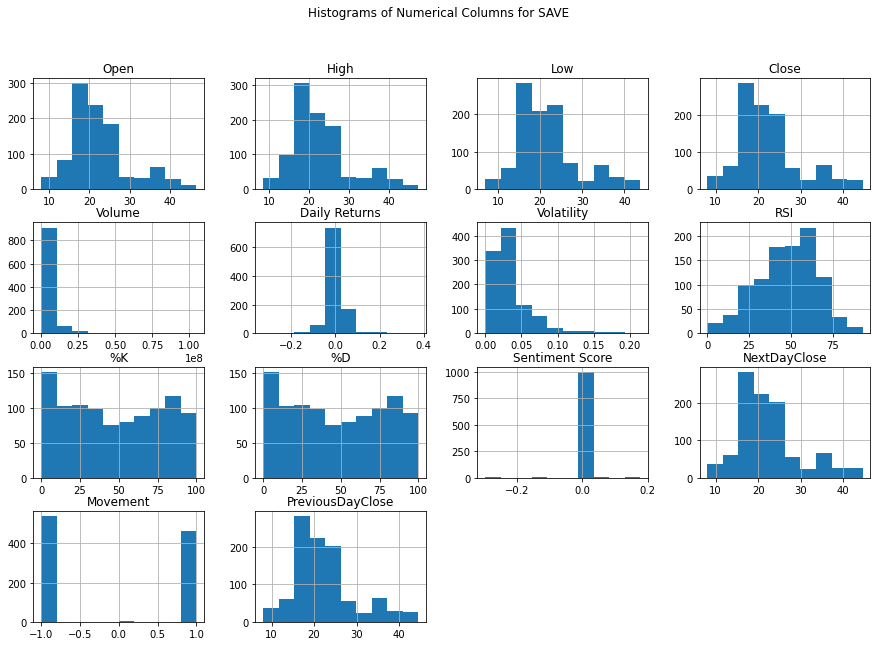

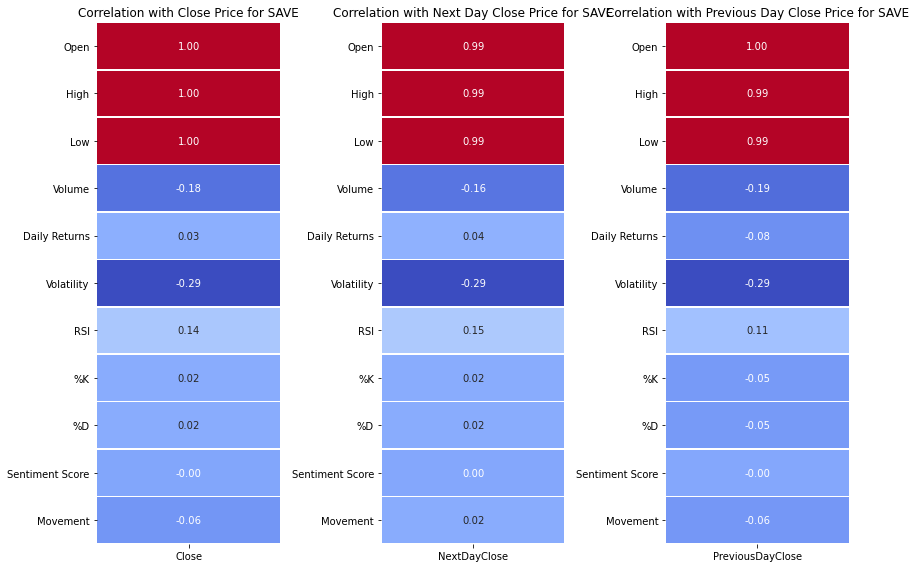

Generating plots for ticker: CLNE

Summary statistics for numerical columns for ticker CLNE:
              Open         High          Low        Close        Volume  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1.006000e+03   
mean      5.779115     5.963131     5.571730     5.758608  4.109960e+06   
std       3.060050     3.174069     2.888967     3.021586  8.217019e+06   
min       1.220000     1.320000     1.050000     1.080000  3.719000e+05   
25%       3.565000     3.710000     3.472500     3.547500  1.480050e+06   
50%       5.190000     5.415000     5.060000     5.190000  2.370250e+06   
75%       7.557500     7.780000     7.330000     7.555000  4.132100e+06   
max      19.549999    19.790001    17.760000    18.639999  1.571548e+08   

       Daily Returns   Volatility          RSI           %K           %D  \
count    1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean        0.001931     0.048599    49.266782    48.311404    48.311404   
std

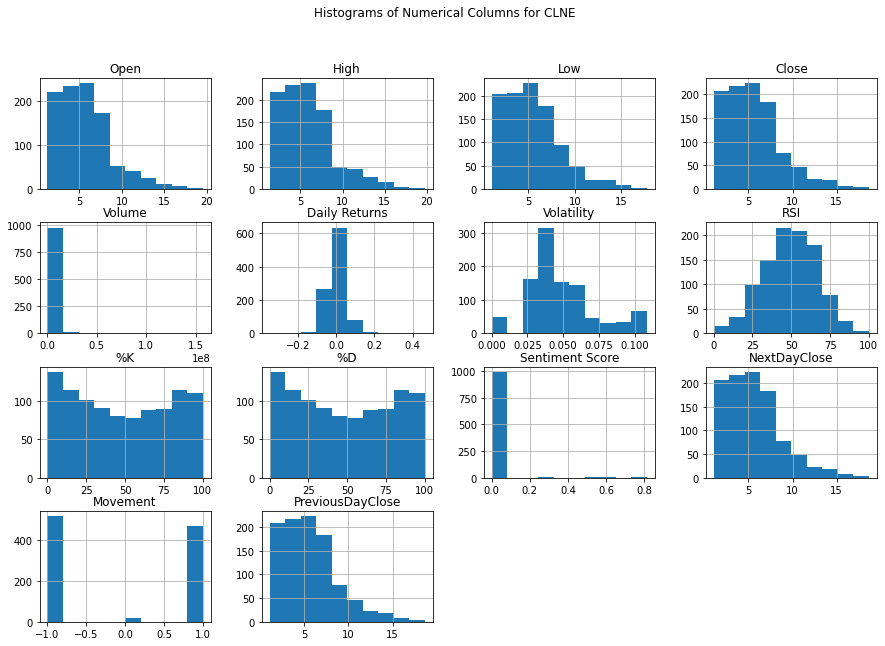

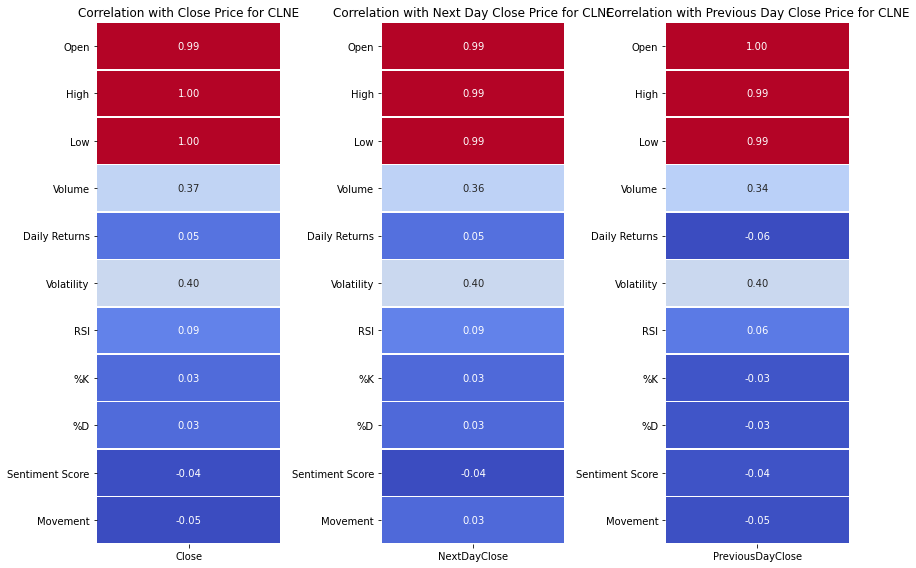

Generating plots for ticker: LAZR

Summary statistics for numerical columns for ticker LAZR:
              Open         High          Low        Close        Volume  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1.006000e+03   
mean     12.504884    12.901369    12.043912    12.444505  5.652152e+06   
std       7.472282     7.817810     7.018546     7.387115  6.656588e+06   
min       2.370000     2.460000     2.300000     2.370000  0.000000e+00   
25%       7.112500     7.374750     6.782250     7.077500  2.140925e+06   
50%      10.450000    10.555000    10.340000    10.400000  4.599500e+06   
75%      16.046500    16.465000    15.557500    16.002500  6.928150e+06   
max      46.590000    47.799999    36.770000    41.799999  7.224460e+07   

       Daily Returns   Volatility          RSI          %K          %D  \
count    1006.000000  1006.000000  1006.000000  957.000000  957.000000   
mean        0.000225     0.045129    47.911746   46.285043   46.285043   
std      

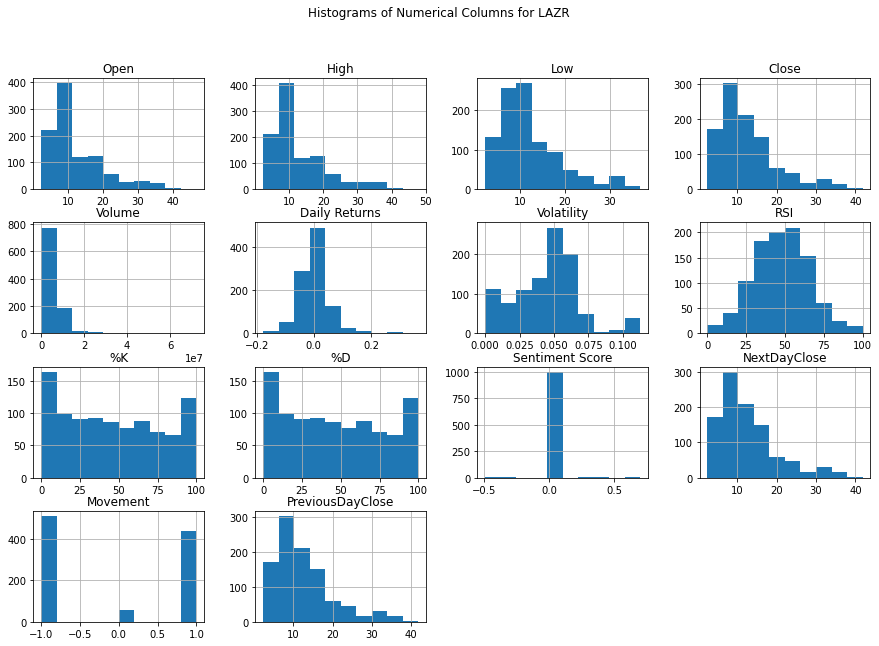

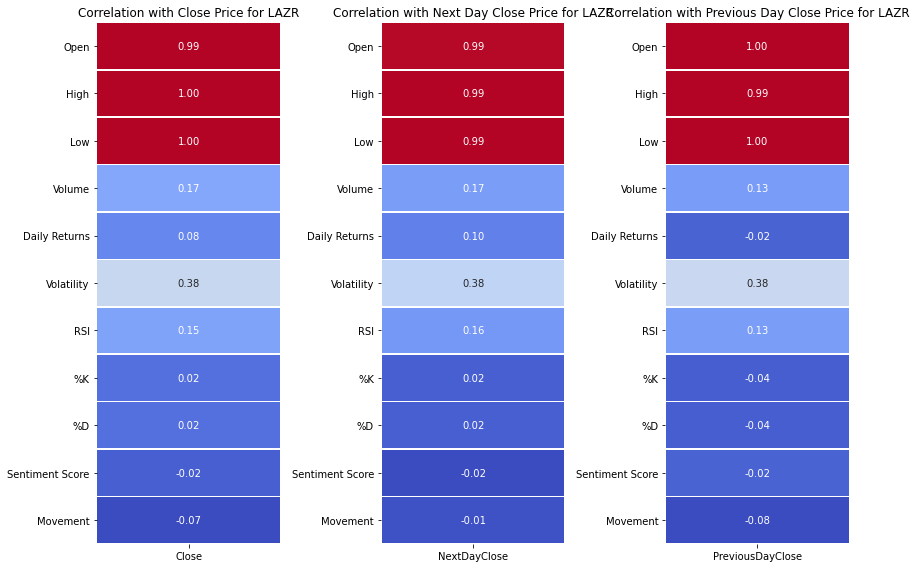

Generating plots for ticker: AMWL

Summary statistics for numerical columns for ticker AMWL:
             Open        High         Low       Close        Volume  \
count  827.000000  827.000000  827.000000  827.000000  8.270000e+02   
mean     8.955875    9.252792    8.635873    8.922713  2.431315e+06   
std      9.439873    9.810080    9.056984    9.394680  2.116533e+06   
min      1.010000    1.040000    0.925000    0.944000  3.449000e+05   
25%      2.645000    2.727500    2.575000    2.625000  1.275200e+06   
50%      4.210000    4.375000    4.100000    4.230000  1.911100e+06   
75%     11.645000   11.875000   11.325000   11.630000  2.990400e+06   
max     41.004002   43.750000   38.389999   42.799999  2.778230e+07   

       Daily Returns  Volatility         RSI          %K          %D  \
count     827.000000  827.000000  827.000000  827.000000  827.000000   
mean       -0.002220    0.042071   44.337472   47.843509   47.843509   
std         0.046742    0.014252   17.360525   30.4

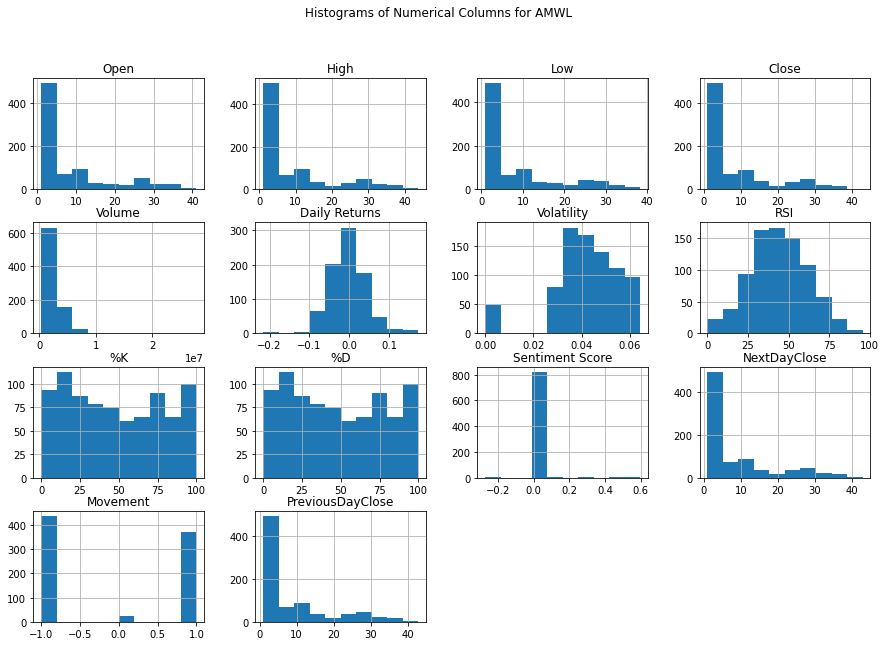

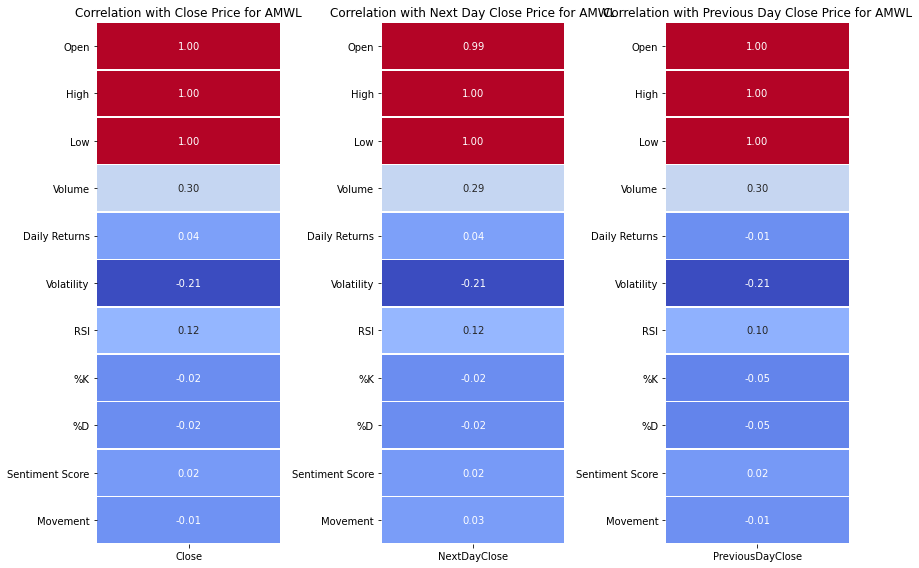

Generating plots for ticker: GEO

Summary statistics for numerical columns for ticker GEO:
              Open         High          Low        Close        Volume  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1.006000e+03   
mean      8.945626     9.137028     8.745000     8.936272  2.748525e+06   
std       2.504603     2.561029     2.434684     2.497111  6.305668e+06   
min       5.110000     5.230000     4.960000     5.110000  5.059000e+05   
25%       7.210000     7.360000     7.090000     7.210000  1.410650e+06   
50%       8.245000     8.415000     8.060000     8.230000  1.975500e+06   
75%      10.662500    10.840000    10.410000    10.627500  2.854250e+06   
max      17.629999    18.420000    17.510000    17.760000  1.882075e+08   

       Daily Returns   Volatility          RSI           %K           %D  \
count    1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean        0.000397     0.033117    49.438680    48.272099    48.272099   
std  

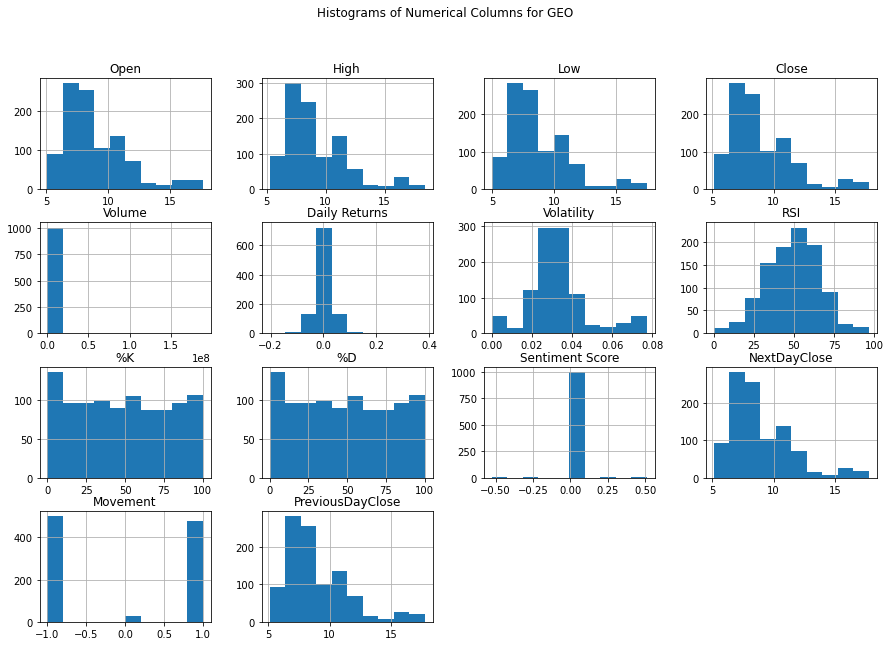

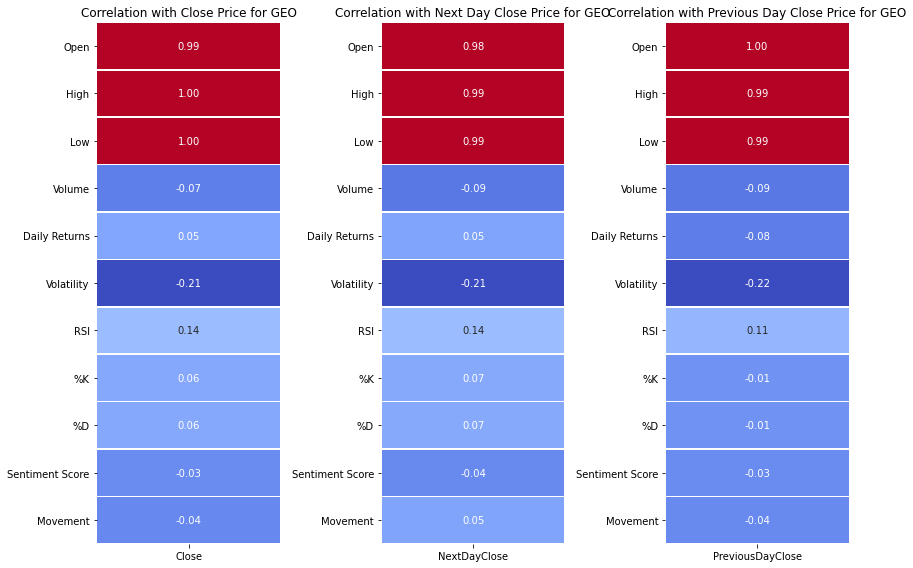

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset.csv')

# Assuming 'Ticker' is the column with the stock tickers
unique_tickers = df['level_0'].unique()

# Loop through each ticker and generate plots
for ticker in unique_tickers:
    print(f"Generating plots for ticker: {ticker}")
    
    # Filter the dataframe for the current ticker
    ticker_df = df[df['level_0'] == ticker]
    
    # Display summary statistics for the current ticker
    print(f"\nSummary statistics for numerical columns for ticker {ticker}:")
    print(ticker_df.describe())
    
    # Plot histograms for numerical columns for the current ticker
    numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Returns', 'Volatility', 'RSI', '%K', '%D', 'Sentiment Score', 'NextDayClose', 'Movement', 'PreviousDayClose']
    ticker_df[numerical_cols].hist(figsize=(15, 10))
    plt.suptitle(f"Histograms of Numerical Columns for {ticker}")
    plt.show()
    
    # Plot correlation heatmap for the current ticker
    plt.figure(figsize=(12, 8))
    corr = ticker_df[numerical_cols].corr()
    
    # Filter correlations related to the target variables
    close_corr = corr['Close'].drop(['Close', 'NextDayClose', 'PreviousDayClose'])
    next_day_close_corr = corr['NextDayClose'].drop(['Close', 'NextDayClose', 'PreviousDayClose'])
    previous_day_close_corr = corr['PreviousDayClose'].drop(['Close', 'NextDayClose', 'PreviousDayClose'])
    
    # Plot correlation heatmap for each target variable for the current ticker
    plt.subplot(1, 3, 1)
    sns.heatmap(close_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
    plt.title(f"Correlation with Close Price for {ticker}")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(next_day_close_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
    plt.title(f"Correlation with Next Day Close Price for {ticker}")
    
    plt.subplot(1, 3, 3)
    sns.heatmap(previous_day_close_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
    plt.title(f"Correlation with Previous Day Close Price for {ticker}")
    
    plt.tight_layout()
    plt.show()


Granger Causality Test for Close Price:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9724  , p=0.0463  , df_denom=4842, df_num=1
ssr based chi2 test:   chi2=3.9748  , p=0.0462  , df=1
likelihood ratio test: chi2=3.9732  , p=0.0462  , df=1
parameter F test:         F=3.9724  , p=0.0463  , df_denom=4842, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0285  , p=0.1316  , df_denom=4839, df_num=2
ssr based chi2 test:   chi2=4.0613  , p=0.1313  , df=2
likelihood ratio test: chi2=4.0596  , p=0.1314  , df=2
parameter F test:         F=2.0285  , p=0.1316  , df_denom=4839, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1221  , p=0.3386  , df_denom=4836, df_num=3
ssr based chi2 test:   chi2=3.3711  , p=0.3379  , df=3
likelihood ratio test: chi2=3.3699  , p=0.3380  , df=3
parameter F test:         F=1.1221  , p=0.3386  , df_denom=4836, df_num=3

Granger Causality
number of lags (no zero) 4
ss

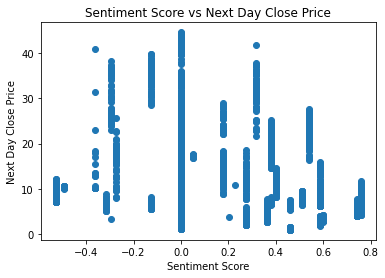

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load your dataset
df = pd.read_csv('dataset.csv', parse_dates=['Date'], index_col='Date')

# Make sure your data is sorted by date and has no missing values
df.sort_index(inplace=True)

# The maxlag parameter specifies the maximum number of lags to consider for the test
# The verbose parameter prints the results
maxlag = 5

# Test if sentiment score Granger-causes close price
print("Granger Causality Test for Close Price:")
gc_test_close = grangercausalitytests(df[['Close', 'Sentiment Score']], maxlag=maxlag, verbose=True)

# Test if sentiment score Granger-causes next day price
print("\nGranger Causality Test for Next Day Close Price:")
gc_test_next_day = grangercausalitytests(df[['NextDayClose', 'Sentiment Score']], maxlag=maxlag, verbose=True)

# Test if sentiment score Granger-causes previous day price
print("\nGranger Causality Test for Previous Day Close Price:")
gc_test_previous_day = grangercausalitytests(df[['PreviousDayClose', 'Sentiment Score']], maxlag=maxlag, verbose=True)

# Plot Sentiment Score vs. Next Day Close Price for visualization
plt.scatter(df['Sentiment Score'], df['NextDayClose'])
plt.title('Sentiment Score vs Next Day Close Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Next Day Close Price')
plt.show()


                  Sentiment Score     Close  NextDayClose  PreviousDayClose  \
Sentiment Score          1.000000 -0.037454     -0.037593         -0.037609   
Close                   -0.037454  1.000000      0.996775          0.996784   
NextDayClose            -0.037593  0.996775      1.000000          0.992739   
PreviousDayClose        -0.037609  0.996784      0.992739          1.000000   
Open                    -0.037522  0.997670      0.993980          0.998877   
High                    -0.037582  0.998764      0.995434          0.997442   
Low                     -0.037330  0.998732      0.995344          0.997823   
Close                   -0.037454  1.000000      0.996775          0.996784   
Volume                  -0.013466  0.119683      0.121363          0.105042   
Daily Returns            0.002751  0.031233      0.037119         -0.032549   
Volatility               0.019018 -0.075117     -0.074248         -0.077074   
RSI                     -0.000110  0.082746      0.0

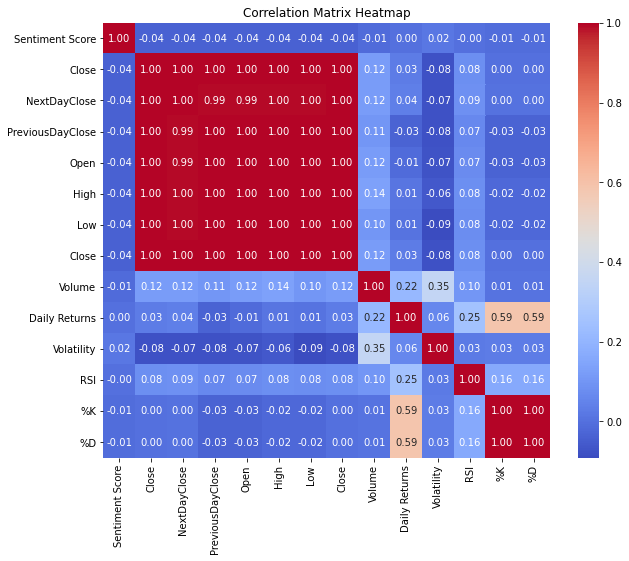

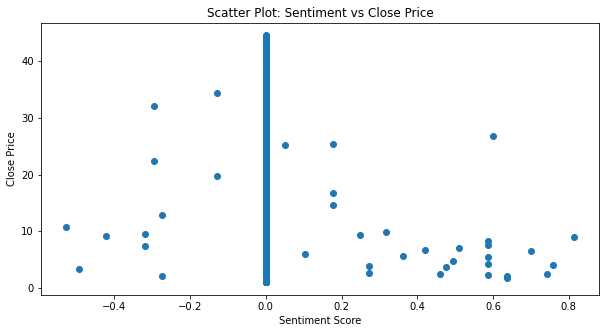

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset.csv')

# Assuming your sentiment column is named 'Sentiment'
# and you have 'Close', 'NextDayClose', 'PreviousDayClose' columns for prices
# Calculate the correlation matrix
correlation_matrix = df[['Sentiment Score', 'Close', 'NextDayClose', 'PreviousDayClose','Open', 'High', 'Low', 'Close', 'Volume','Daily Returns','Volatility','RSI', '%K', '%D']].corr()

# Output the correlation matrix to the console
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scatter plot for Sentiment vs Close Price
plt.figure(figsize=(10, 5))
plt.scatter(df['Sentiment Score'], df['Close'])
plt.title('Scatter Plot: Sentiment vs Close Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Close Price')
plt.show()

# Note: You may need to adjust 'Date' formatting and indexing for the time series plot
# Ensure that the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
